# Luentopäiväkirjat

## Hieman minusta, tavoitteistani
Datatiede ja data mining kiinnostaa minua teoreettisesti sekä käytännössä. Pidän analytiikan tekemisestä. Haasteena siinä on, että mielenkiintoni pyrkii lässähtämään alkuinnostuksen jälkeen - pidän uusien juttujen oppimisesta, en niinkään niiden soveltamisesta. Tavallaan analytiikka on siitä mielenkiintoinen aihe, että sen tarkoitus on luoda uusia oivalluksia, ja se voisi ruokkia ADHD-aivojani senkin jälkeen, kun menetelmät on opittu.

Olen työelämässä, pitkäaikainen konsultti, nyt konsultoinnin osaamisjohtaja ja kehittäjä. Voidakseni saada aikaan muutosta, analytiikka on hyvä työkalu sen perustelemiseen. Olen jotenkuten tietoinen, että sitä voi myös väärinkäyttää.

Yritin tehdä vuonna 2010 data miningista gradun. Mitään en saanut paperille, mutta opin, että datan käsittely on tosissaankin vähintään 80% työstä.

# Luento 1

## Osallistuminen ja lähteet
Osallistuin luentoon ja demoon keväällä 2021, mutten kyselysessioon. Luin luento-notebookin. Asensin Anacondan Windowsille ilman ohjeita. Mietiskelin miten tutkisisin aineistoani - projektin toimitusdataa. Kohosen kartta houkuttaisi erilaisten projektien luokitteluun, luin aiheesta https://medium.com/@dalicodes/overview-of-self-organizing-maps-som-with-its-python-implementation-in-determining-safe-airlines-db8f6018a2b. Akuuttia oli saada yhteys tietokantaan, siihen löysin esimerkin https://medium.com/@devartimahakalkar/connecting-sql-datasets-with-pandas-105f8eb68f1a. Tutkin saatavilla olevaa aineistoa ja piirtelin E/R-kaaviota asioiden suhteista. (Keväällä 2022 päädyin tekemään tehtävän toisesta aiheesta).

## Keskeiset asiat
Datan määrä lisääntyy. On muotoutunut opinala ja ammattikunta, jotka keskittyvät suurien tietomäärien analysointiin ja näistä analyyseista saatavan tiedon soveltamiseen toiminnan kehittämisessä. Datan työstämiseen on eri keinoja, mm. koneoppimisen tai tilastollisen analyysin työkalut. Kurssilla opetetaan koodiperusteista lähestymistapaa, koska koodi:
a) on läpinäkyvää; 
b) siihen voi liittää versionhallinnan; 
c) sille on paljon yhteisötukea; 
d) palasina koodi on uudelleenkäytettävää

Jupyter on näppärä ympäristö, siinä voi yhdistää koodin ja dokumentaation notebook-muotoon. Koodia voi ajaa paloissa. Koodiprojektiin on helppo tuoda valmiita kirjastoja. Pythonilla ja Pandas-kirjastolla voi nopeasti käsitellä dataa ja jatkojalostaa sitä paremmin analysoitavaan muotoon. Kirjastoja on lisäksi esim. kuvantamiseen.

Datatieteilijällä on skillsejä kommunikaatiossa, tilastotieteissä, ohjelmoinnissa ja liiketoiminnassa. Kun löytyy taitoja kaikista, on täydellinen. Erilaisia osaamisen osa-alueita esim. metrokartassa jaoiteltu toisin ja niitä on monia ja näihin liittyviä työkaluja (softia, menetelmiä, jne.) vielä enemmän.

CRISP-DM kuvailee tietämyksen luonnin vaiheita, kun saatavilla on jotain dataa. Vaatimuksia ovat jonkin dataan liiketoimintaongelman ymmärtäminen, datan haltuunotto, mallintaminen, arviointi ja tätä kautta ongelman ymmärtäminen yhä paremmin. Tietämyksen lisääntyminen on syklistä tässä. 


## Oivallukset
1. Datatieteily vaikuttaa mahdottoman mielenkiintoiselta
2. Mitä ollaan tekemässä -> liiketoimintaongelmien parempi ymmärrys datasta jalostetulla tietämyksellä
3. Mahtaako täydellisen datatieteilijän työ skaalautua. Jos osaat kaiken itse, voit tehdä kaiken - asiakkaan kanssa tehtävästä ongelmanmuodostuksesta datan putsaamisen kautta toteutukseen ja analyysiin. Todella hyvää asiakaspalvelua ja tehokasta tekemistä, kun tiedonvaihtoon ei mene aikaa. Mutta jossain vaiheessa yhden konsultin tunnit kalenterista loppuvat ja työtä joutuu jakamaan ja ihmiset erikoistuvat. The Data Scientist Veen Diagram näyttää tässä valossa enemmän ostoslistalta, kun kootaan tiimiä.
4. Koodipohjainen lähestymistapa lienee fiksumpi kuin aiemmin soveltamani graafiset työkalut. Ymmärrän toistettavuuden ja versionhallinnan arvon.
5. Erinäisten funktioiden soveltaminen dataan .apply()-metodilla näyttää hemmetin näppärältä. Aiemmin olisin tehnyt vastaavia SQL:ssä.


## Tuunaukset (kevät 2021)
1. Chat sittenkin piiloon ja kysymysten läpikäynti sopivissa välein? --> Voi kysyä chatissa kysymyksensä ilman, että keskeyttää luennon.
2. Omaa stressiäni olisi vähentänyt, jos luennoitsija olisi kertonut etukäteen, mistä aikoo luennoida. Välillä ADHD-aivoni juoksivat muutaman askeleen edellä ja teki mieli kysellä tarkentavia asioista, jotka olivat vain myöhempänä listalla. Jos lista opittavista asioista olisi ollut etukäteen tiedossa -> ei tarvitse jännittää, opinko kohta haluamani asian vai unohdanko sen.

## Koodi
Sain yhteyden pyodbc:n kanssa

In [ ]:
# import libraries
import pandas as pd
import pyodbc

# connect and query database to build dataframe
DB = {'servername': 'localhost\SQLSERVER2019',
      'database': 'Project Deliveries',
      'uid': '',
      'pwd': ''}

QUERY = 'SELECT TOP (1000) * FROM [dbo].[Analysis Data View] WHERE [Delivery Item type] is not null'

conn = pyodbc.connect('DRIVER={SQL Server};SERVER=' + DB['servername'] + ';DATABASE=' + DB['database'] + ';Trusted_Connection=Yes')
df = pd.read_sql_query(QUERY, conn)

print('Connected. Queried.')

# test that we have data
df.head(10)

# Luento 2

## Osallistuminen ja lähteet
Osallistuin puoleen luentoon keväällä 2021, toisen puolikkaan samasta luennosta kuuntelin 2022. Demon katsoin 2021 vähän puolella silmällä, datan raapiminen ei suoraan sanoen hirveästi kiinnosta lähteenä. Olen sitä tehnyt alkeellisimmilla työkaluilla ja oli kiva nähdä, miten ne olivat kehittyneet. Harjoituksen osalta keskityin muokkaamaan toimitusdatastani aikasarjoja.

## Keskeiset asiat
Guon työnkulku esittelee datatieteen prosessia. 80% ajasta voi varata datan valmisteluun. Jos data on alunperin suunniteltu analytiikkaa varten, aikaa menee tietenkin suhteessa paljon vähemmän. Mitä tuotteistetumpi tai paketoidumpi analyysi, sitä vähemmän aikaa kuluu. Tieteellisessä työssä pyritään pikemminkin laajentamaan tuotteistuksen rajoja ja käytetty aika on suurempi kuin muissa sovelluksissa.

Valmistelua seuraa reflektio, tiedon luonti, kokoustelu. Huomataan, että alkuperäinen kysymys on harvoin lopullinen, kun keskustelujen ja ajatusten edetessa löydetään mielenkiintoisempia ja parempia kysymyksiä ja aineistoja. Kun on disseminaation vuoro, tässä on pari eri vaihtoehtoa: joko uusi tieto voi vaikuttaa toimintatapoihin tai toisena ääripäänä datakoneistosta tulee työkalu, jota käytetään jatkuvasti ajantasaisen tiedon tai jopa tietämyksen lähteenä.

Business intelligencen puolella puhutaan yleisesti ETL-prosessista: extract, transform and load. Data on lähteessä, josta se otetaan, muunnetaan sovellettavaan muotoon ja ladataan raportoinnin tietovarastoon. Tavoitteena on rakentaa monikäyttöinen tietovarasto, jota käytetään raporteissa ja josta on helppo hakea tietoa eri käyttötarkoituksia varten. Tiedon hyödyntäminen on hyvin tuotteistettua. Kyseessä on vakiintunut toimiala. Datatieteen puolella vastaava prosessi on DAD: discover, access ja distill. Periaate on sama kuin BI:ssä - mutta tempo on nopeampi. Tarkoitus on tehdä analyysi päivän sisällä alusta loppuun.

## Oivallukset
1. Raavinta näyttää nykyään helpolta, Scrapy on kypsän oloinen työkalu. Itse latasin aikoinaan kauden 2008-2009 NHL play-by-play -tilastot netistä web spiderilla, muunsin ne XHTML-muotoon jollain komentojonokäsittelyllä, käänsin yksittäiset pelit tilastoineen sopivaan XML-muotoon XSLT-transformaatiolla ja tämän jälkeen latasin datan tietokantaan. Nykynuoret pääsevät niin helpolla.
2. ETL on töistä tuttua. Ajatus DAD:sta päivän sisällä tehtävänä on innostava, sillä tiedon logistiikka on usein raskain osuus.
3. Itse olin jopa yllättynyt, kuinka suuri osa yrityksistä käyttäisi nykyaikaisia työkaluja tai omaa data-analytiikkatiimin.

## Tuunaukset
- Opiskelijat etsivät kaupallisen datatieteen sovelluskeissejä netistä, esittävät niitä soveltavan yrityksen hyötyjen näkökulmasta


## Koodi

In [ ]:
# lue csv, jossa sarake subjectANDpreview sisältää tekstiä
# vektorisoi sanamäärät
# listaa 30 yleisintä sanaa listaan top_dict
# Liiketoimintatiedon analyysin kurssille tekemästäni analyysista

df = pd.read_csv(phile,header=0,delimiter=";",quoting=3)
y = df.loc[:, df.columns.intersection(['subjectANDpreview'])]

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
data_cv = cv.fit_transform(y.subjectANDpreview)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

# Luento 3

Katselin luennon tallenteena ja luin esitehtävänä annetun artikkelin. Koodiklinikan kuuntelin keväällä 2021 ja olen sieltä saatua kategoriamuuttujien muuntoskriptinpätkää käyttänyt muutaman kerran.

## Keskeiset asiat

Koneoppimisella voidaan mm. opettaa aineiston perusteella mallia tai algoritmia ennustamaan jotakin arvoa, eli se voi tehdä ei-triviaaleja päätelmiä ilman ohjelmointia. 

Koneoppimista on ohjattua, ohjaamatonta, vahvistettua ja syväoppimista. Ohjattu ja ohjaamaton ovat näistä keskeisimpiä. 
Ohjatussa oppimisessa raakadatan pohjalta opetetaan malli ennustamaan jokin muuttuja (label) toisien muuttujien eli piirteiden perusteella. Lähtödatassa piirteet ovat sarakkeita matriisissa ja yksittäiset tapaukset ovat rivejä. Lisäksi label olisi sarake. Menetelmiä on monia erilaisia. Mallin opettamisen jälkeen sitä voi käyttää ennustamiseen - mutta tätä ennen mallia kannattaa arvioida. Arvioinnissa vertailukohtana on yleensä naiivi ennuste tai satunnainen tulos. Jukan esimerkissä "kannattaako myöntää luottokortti" naiivi ennuste olisi "aina kyllä". Valmiille ennustemallille annetaan ennustetta varten samat piirteet, kuin mitä on käytetty mallin opettamisessa.

Ohjaamattomassa oppimisessa tarkoituksena on datamassan kuvaileminen jotenkin, esim. ryvästämällä. Toinen esimerkki on laadullisen materiaalin muuntaminen kvantitatiiviseksi, vaikkapa konenäkösovelluksella tai luonnollisen kielen prosessoinnilla. 
Piirteet ja niiden laatu ovat koneoppimiselle keskeisiä, ei pelkästään oikean menetelmän valinta. Piirteitä voi järkeillä arvioimalla ja miettimällä selittäviä tekijöitä tai voidaan käyttää kaikkia saatavia datapisteitä ja yrittää löytää niistä parhaiten ennustavat arvioimalla niiden vaikutusta mallin ennustuskykyyn. Piirteiden jalostaminen on merkittävä osa koneoppimisen työtä: standardointia, kohinan poistamista yms. laadullista parantamista, joka palvelee mallin ennustekyvyn parantamista. Piirteiden valinta on tärkeää - pyrkimyksenä on yleensä vähentää piirteitä, jotta malli toimii mahdollisimman yksinkertaisesti, tehokkaasti ja ennustettavasti. Piirteiden valinnassa voi tehdä myös virheitä - näitä virheitä oli luokiteltu käytettäväksi "data fallacies" -taulukoksi. Osa näistä olikin jo tuttuja, osa mielenkiintoisia uusia tuttavuuksia.

Koneoppiminen ei ole tekoälyä. Tekoäly on jotain laajempaa - jotain joka pystyy toimimaan itsenäisesti, havainnoimaan, analysoimaan, tekemään päätöksiä ja laittamaan niitä toimeen. Tekoäly on kuitenkin usein markkinointinimike koneoppimiselle. 

## Oivallukset
1. Enpä ollut ajatellut td-idf:ää piirteiden erottamisena, vaikka semmoisen tuossa liiketoimintatiedon analyysin kurssille rakensin
2. Tieteellisessä analyysissa piirteiden käyttö on tarkempaa, ne tulee yksilöidä ja niiden tilastollinen merkittävyys tutkia
3. "Ei-triviaali päätelmä ilman ohjelmointia" jäi mieleen - monia juttuja voisi speksata toimimaan if-lauseillakin, mutta koneoppimisen kanssa tätä ei tarvita
4. Ohjaamattoman oppimisen käyttäminen piirteiden luomiseen - esim. ryvästäminen sitä varten, että sitä käyttää myöhemmin
5. Kategoriamuuttujien muuntaminen 

## Tuunaukset
- Opiskelijoiden pienryhmät saavat tehtäväkseen esitellä ohjaamattoman, ohjatun, vahvistetun ja syväoppimisen periaatteet yleisellä tasolla viidessä minuutissa. Pienryhmät tekevät esityksensä johdantona luennolle.

## Koodi

In [ ]:
# get month name from date column, convert into a category parameter

import datetime as dt

dfall['Month'] = pd.to_datetime(dfall['DATE'], format='%m').dt.month_name().str.slice(stop=3)
dfall_months = pd.get_dummies(dfall['Month'])
dfall = pd.concat([dfall, dfall_months], axis=1)

# Luento 4
Suunnittelin katselevani tallenteen ja vilkuilin läpi esimateriaalin. Tallenteen katselu osoittautui nopeasti liian hämmentäväksi kokemukseksi. Tallenne oli aivan sietämätöntä katsottavaa, joten se jäi kesken. Demoklinikan kuuntelin keväällä 2021.

## Keskeinen sisältö
Keskeistä datatieteessä on, että on jokin ongelma, jota lähdetään tutkimaan. Ei niin, että murskataan lukuja ihan koska vaan voimme. On tärkeää myös ymmärtää, kenen ongelma se on, tai kenen näkökulma siihen otetaan. 

Airbnb-asunnoissa voi olla vaikea yöpyä metelin takia.

## Oivallukset:
-	Olisi pitänyt mennä toisinaan luennolle ja erityisesti tänä kertana, mutta kevät oli taas tosi kiireinen :(


# Luento 5

Kuuntelin vierailuluennon keväällä 2021.

## Keskeinen sisältö

https://colab.research.google.com/github/TeemuMikkonen/JODA-NLP/blob/main/Solita_JODA.ipynb

NLP on luonnollisen - ei rakenteellisen - kielen käsittelyä. Rakenteettomuus on se haaste, normaalisti koneoppiminen vaatii numeraalista dataa. Esikäsittely ja piirteiden käsittely tulee tässä esille. Tuttu sovellus tästä on chat-bot - nämä pystyvät hoitamaan nykyään selvimpiä asiakaspalvelutapauksia. Konekäännökset on toinen sovellus, joka on monille tuttu. Tekstimassojen luokittelu ja metatiedottaminen voisi olla yksi myös - tällöin kyseessä on ohjattu oppiminen, sillä luokat ovat valmiina. Tekstimassojen teemojen etsiminen on esimerkki ohjaamattomasta oppimisesta NLP:n yhteydessä.

Keskeinen termi NLP:ssä on korpus, eli (yleensä) iso tekstimassa, jota käytetään analyysin lähtömateriaalina. Korpus muunnetaaan numeraaliseksi erilaisilla sana-dokumenttimatriiseilla (tämä on itsessään ohjaamatonta oppimista). NLP:ssä tärkeää on kielen perustmuotoistaminen lemmaamalla ja stemmaamalla (https://data.solita.fi/finnish-stemming-and-lemmatization-in-python/). Lisäksi yleensä on tarpeen poistaa ns. stopwordit eli hukkasanat, eli sanat joilla ei ole arvoa analyysille. Esim. verbi "olla". 

Analysoin liiketoimintatiedon analyysikurssille toimeksiantajan lähettämiä meilejä ja niiden otsikoissa käytettyjen sanojen merkitystä avausprosentille. Sovelsin Teemun esimerkkiä laajasti, sekä Alice Zhao:n esimerkkiä (https://www.youtube.com/watch?v=xvqsFTUsOmc / https://github.com/adashofdata/nlp-in-python-tutorial)

## Oivallukset:
- Teemun vertailu "kolikonheittoon" - ts. naivi algoritmi. Miten voisi soveltaa omaan työhön?
- Stop word -listat ovat kontekstiriippuvaisia - pitää miettiä projekteittain. 
- Dokumentti-sanamatriisit lähtevät koodilla aika helposti, samoin kuin sanapilvet, jotka on nopea tapa tutkia sisältöjä
- Voikko on näppärä työkalu, kunhan sen saa asennettua (ei ollut hirveän helppoa Windows-ympäristössä
- Picklen opin Zhaon videosta, sovellan harjoitustyössä, ettei tarvitse tietokantayhteyksiä notebookin ajamiseen

## Tuunaukset
- Katsomalla Zhaon videon ja säätämällä hänen koodiaan saa hyvin nopeasti vektorisoitua tekstiä. Opiskelijat voisivat saada tehtäväksi vektorisoida jonkin tekstimassan.

## Koodi

In [3]:
# suomen kielen perusmuotoistaminen

#!pip3 install python-libvoikko
# works:
from libvoikko import Voikko as v
# run once
# Define a Voikko class for Finnish
#v = libvoikko.Voikko()
#v.setLibrarySearchPath("c:/Voikko")
import libvoikko
v = libvoikko.Voikko("fi")

def voikota(text, stopwords):
    
    words = text.split(" ")
    words

    baseform_words = []

    for word in words:
        voikko_dict = v.analyze(word)
        if voikko_dict:
          word = voikko_dict[0]['BASEFORM']
          if not word in stopwords:
                baseform_words.append(word)
        else:
            if not word in stopwords:
                baseform_words.append(word)
        
    text_bf = " ".join(baseform_words)
    
    return text_bf

# Luento 6
Kuuntelin luennon tallenteen ja luin Forbesin artikkelin. Tein viime vuonna harjoitustyönä projektien ryvästämistä niiden työn painottumiseen ajan funktiona. Self-organizing-map-mallista tuli ihan asiallinen, projektit selkeästi valikoituivat järkevästi - siitä ei kuitenkaan tullut ihan valmista enkä keksinyt sille käyttöä, joten tein tänä vuonna toisen mallin. Alla kuvassa ryväs, jossa suuren projektin toimitus lähtee hitaasti käyntiin, kiihtyy, jatkuu tasaisena ja kestää pitkään.
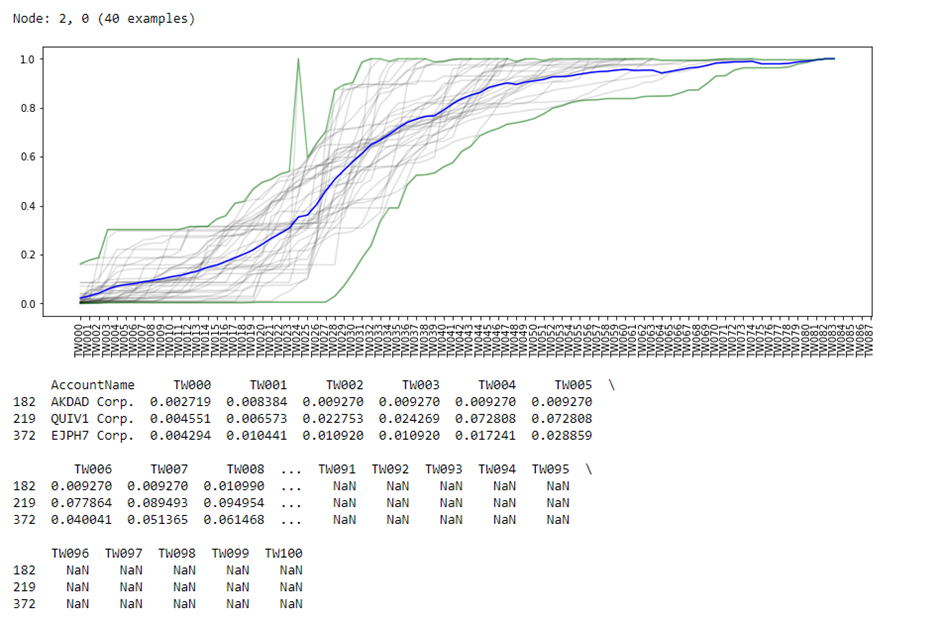
## Keskeinen sisältö
Ohjaamattomassa oppimisessa ensimmäinen vaihe on jälleen piirteiden erottaminen ja jalostaminen. Tämän jälkeen koulutetaan malli ja arvioidaan sen hyvyyttä. Ohjaamattomassa oppimisessa ei ohjatun tapaan tehdä ennustemallia vaan malli luokittelee alkioita joihinkin ryhmiin, ryvästää niitä. Mallia voi arvioida mm. tarkastelemalla, muodostavatko segmentit jotain oikeassa elämässä merkittäviä ryhmiä tai jaotteluja. Tätä ryhmää voidaan sitten soveltaa ennusteissa tai analyyseissa. Uusia tietueita voidaan mallin avulla sijoittaa samaan ryhmittelyyn ja pyrkiä ymmärtämään tämän ominaisuuksia sen pohjalta - esim. onko uusi asiakas todennäköisesti voitollinen sen pohjalta, mihin ryppääseen se kuuluu. Ryvästäminen voi myös itsessään luoda oivalluksia, ymmärrystä minkälaisia erilaisia ryhmiä lähtöaineisto muodostaa.

Jälleen lähtöaineisto täytyy jalostaa - ryvästäminen erityisesti on herkkää erilaisille mittayksiköille. Piirteiden tulee olla numeraalisia ja ne tulee normalisoida, jotta ne ovat vertailukelpoisia. Lisäksi tulee käsitellä alkiot, joissa piirteissä on puutteita. Puuttuvan arvon sijaan käytetään usein keskiarvoa, on myös muita vaihtoehtoja, kuten leffaesimerkissä käytetty lähtöarvojen poistaminen. Ryvästämisen menetelmistä yksinkertaisin on k-keskiarvoryvästys, jossa käytännössä etsitään mielivaltaisulotteisesta avaruudesta k kappaletta pisteitä, jotka kuvaavat ryppäitä lähtöaineistossa. Tietue kuuluu siihen ryppääseen, jonka edustavaa pistettä se on lähinnä. 

Ostoskorianalyysi, aihemallinnus ja verkostoanalyysit ovat myös esimerkkejä ohjaamattomasta oppimisesta. Aihemallinnuksessakin tunnistetaan ryhmiä - nämä ryhmät ovat vain aiheita, joita lähtöaineiston dokumentit edustavat. Pohjana tässä on vektorimalli sanoista. 

Ohjaamattomassa oppimisessa tapahtuu aina vähän kuitenkin lopulta ohjaamista, ainakin ryppäiden määrän valinnassa. Piirteiden jalostamisessa voi myös ohjata tulosta. Tulosta on houkutus manipuloida. Tiedon luojalla on tässä paljon vastuuta. Ja varmaa on, että jos lähtödata on huonoa, lopputulos on huonoa - "garbage in, garbage out".

## Oivallukset:
-	Tuntemattomien tuntemattomien esiintuonti projektin alussa miettimällä miten tämä projekti menisi mahdollisimman huonolla tavalla vihkoon on ehkä jotain, jota voisin soveltaa. Riskianalyysi projektien alussa on välillä aika mielikuvituksetonta.
-	Ryvästäminen itsessään voi luoda oivalluksia - "ai näinkin meidän lähtöaineiston voi nähdä tai ryhmitellä"
-	Pythonille löytyy hyvät valmiit kirjastot piirteiden normalisointiin yms. käsittelyyn, mikä tekee hommasta helppoa
-	Pandasin fillna() on hirmuisen kätevä puuttuvien arvojen paikkaamiseen.
-	Kun aineisto on käsitelty, eri ryvästämismenetelmien soveltaminen eivät näytä vaativan montaakaan riviä koodia (koska kirjastot)
-	"Dataperformanssi" oli hieno termi - tiedetään tai oletetaan millaiset ryppäät (tai aiheet) aineistosta voisi löytyä ja etukäteen päätetään mitä se tarkoittaa, sitten ajetaan koodia siihen asti, että nähdään toivotut ryppäät ja niillä todistaa se oma teesi.

## Tuunaukset
- Tehtävänä esitellä jokin ohjaamattoman oppimisen menetelmä 5 minuutissa. Satunnaiset henkilöt esittävät, kaikki palauttavat esitysmatskun

## Koodi

In [ ]:
# x_scaled is a matrix where rows are accounts and columns are number of weeks since their first work order
# Value in the matrix is cumulative work hours, normalized and empty values replaced with avg
# One row then is actually a timeseries or can be understood as a signal
from minisom import MiniSom
som = MiniSom(3, 3, data.shape[1], sigma=0.3, learning_rate=0.3)

# Luento 7

Kuuntelin luennon Panoptosta.

## Keskeinen sisältö
Luentoviikon aihe oli visuaalinen analytiikka ja miten visualisointia hyväksikäytetään datatieteessä? Pääosin kahdessa asiassa - analysoidessa dataa (prosessinäkökulma/kartoittava analyysi) ja lopullisessa datatuotteessa (kommunikointinäkökulma). 

Visualisointi kutoutuu datatieteen prosessiin, on osa sitä alusta loppuun. Luennolla esitettiin eräs prosessimalli, missä vaiheessa visualisointia tapahtuu. Oma näkökulma on, että jatkuva visualisointien käyttö on hyvä idea, eikä kannata noudattaa tämmöisiä prosessimalleja muuten kuin hahmottamaan tyypillistä keissiä. Prosessin lopussa visualisointia tulisi varmaankin yleensä olla, en ainakaan keksi analyysia, jota en visualisoisi lopussa. Kyseessä on kuitenkin tehokkain tapa paketoida ja siirtää analyysissa opittu ymmärrys.

Visualisointi auttaa ymmärtämyksen lisääntymistä - huomasin tämän itsekin harjoitustyössä, kun sovelsin piirteiden erottamisessa aikasarjoja ja korrelaatiolämpökarttoja. Visuaalinen esitysmuoto auttoi ymmärtämään lähtödataa. Visuaalisesti on helppo hahmottaa skaalaa - paljon helpompaa, kuin tuijottamalla numerotaulukoita. Lisäksi virheitä on helppo havaita, jos visualisointi näyttää esim. ihan räjähtäneeltä, vaikka odotuksena olisi hieno aaltokuvio histogrammissa. Se auttaa hallitsemaan tietomäärän aiheuttamaa ähkyä, hukkumista loputtomiin numeroriveihin. Visuaalisen analytiikka fasilitoi ja tehostaa prosessia kartoittavan analyysin aikana. 

Visualisointi on hienoimmillaan vuorovaikutteista. Vuorovaikutteisen datavisualisoinnin kanssa datan ymmärrystä voi mm. kommunikoida muille tehokkaasti, ja näin välillisesti vaikuttaa omaan toimintaympäristöön.

Kun on kyseessä analyysin lopputuloksen visualisointi, varomaton datapolun kulkija voi mennä täysin metsään. Visualisointitavat ovat oma tieteen- tai taiteenlajinsa.

Harjoitustyön lopputuloksena tuotin itse dashboardin, jonka visualisoinnissa käytin esimerkkinä paljon tätä: https://plotly.com/python/time-series/ - hyvä, helposti ymmärrettävä esimerkki.

## Oivallukset
- Visualisointi on kommunikointia.
- Visualisointi on ymmärryksen saavuttamisen työkalu.
- Visualisointi on datan debugausväline.
- Visualisointi on vaikeaa. Ei teknisesti. Teknisesti päästään kirjastoja käyttämällä uskomattomiin tuloksiin muutamalla koodirivillä.

## Tuunaukset
- Opiskelijat etsivät mielenkiintoisia ja uudenlaisia visualisointeja ja jakavat ne Slackissa muutaman kommentin kera. Jokainen myös peukuttaa lempilöydöstään. Paras visualisointi voittaa.

## Koodi

In [ ]:
# toimivaa koodia sanapilvien luomiseen (raskaasti lainattu täältä: https://github.com/adashofdata/nlp-in-python-tutorial)

# Reset the output dimensions
#!pip3 install wordcloud

from wordcloud import WordCloud

wc = WordCloud(stopwords=['emoji','ale'], background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [100, 100]

data_clean = pd.DataFrame(y32)

data_clean.set_index('open3rds')

print(data_clean.head())

for iii in range(0, 2):
    
    wc.generate(data_clean.iloc[iii].subjectANDpreview)

    plt.subplot(3, 1, iii+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
plt.show()

# Oppiminen vrt. oppimistavoitteet
Kurssihan jäi minulta viime keväänä kesken. Työt vaan menevät helposti edelle. Tänä keväänäkin oli sama lähellä. Tätäkin kirjoitan 40 minuuttia ennen palautusaikaa, aina se aika on tiukalla. 

Opin paljon! Opin kuinka valmiita työkalut ovat verrattuna 2010 tilanteeseen, jolloin käymälläni data mining-kurssilla käytimme menetelmään erikoistuneita työkaluja. Graduntynkääni käytin RapidMineria. Kaikki tuntuu käyvän muutamalla koodirivillä, joista löytyy esimerkkejä netistä vaikka kuinka paljon. Data taipuu helpolla Jupyter Notebookissa.

Viime keväänä sain aikaiseksi ihan pätevän luokittelumallin. Sille oli vaikea keksiä mitään sovellusta, vaikka se luokittelikin nätisti signaalin näköisiä projektiaikasarjoja. Olin jälleen yllättynyt kuinka helppoa toimivan mallin teko oli. Tänä keväänä sama homma - harjoitustyö eteni todella mukavaa vauhtia, vaikka python ei kielenä ollut tuttu ennen viime kevättä. Valitsin hieman helpomman aiheen, koska tiesin aikani rajoitteet. Kun työ etenee ja data paljastaa luonnettaan, on helppo päässä flow-tilaan. Sovelsin oppimaani jo toisella kurssilla, Jupyter Notebookia työkaluna. Töissä en ole vielä käyttänyt, mutta ehdottomasti näen, että tulen käyttämään myöhemmin.